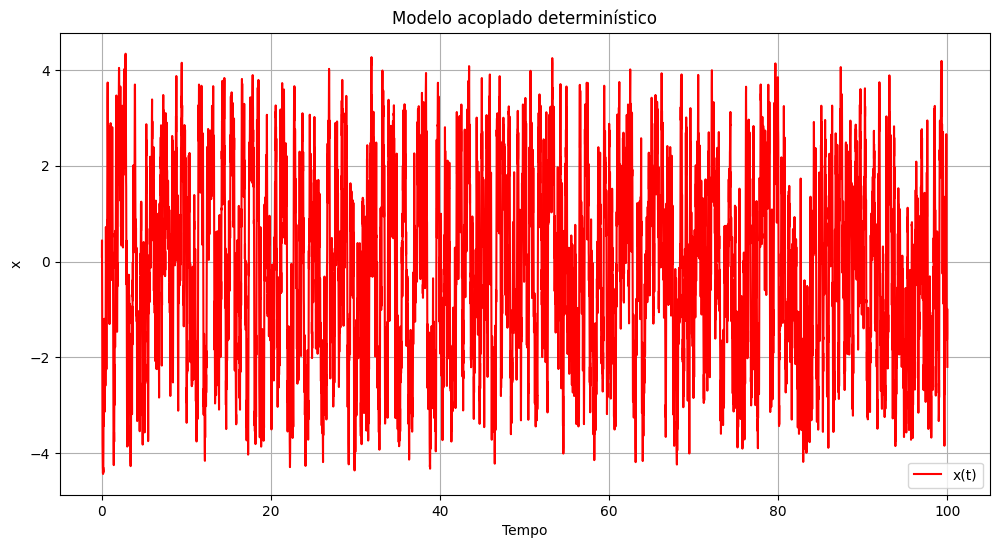

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parâmetros
lambda_ = 1.0
epsilon = 0.1

# Sistema original
def f(t, u):
    x, y1, y2, y3 = u

    dx = x - x**3 + (lambda_ / epsilon) * y2
    dy1 = (10 / epsilon**2) * (y2 - y1)
    dy2 = (1 / epsilon**2) * (28 * y1 - y2 - y1 * y3)
    dy3 = (1 / epsilon**2) * (y1 * y2 - (8/3) * y3)
    
    return [dx, dy1, dy2, dy3]

# Condições iniciais e intervalo de tempo
u0 = [0.1, 0.01, 0.01, 0.01]
t_span = (0.0, 100.0)
t_eval = np.linspace(*t_span, 10**4)  # mais pontos para resolução fina

# Resolver o sistema
sol = solve_ivp(f, t_span, u0, t_eval=t_eval)

# Plotar x(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='x(t)', color='red')
plt.xlabel("Tempo")
plt.ylabel("x")
plt.title("Modelo acoplado determinístico")
plt.grid(True)
plt.legend()
plt.show()


In [6]:
import numpy as np
from scipy.signal import correlate
from statistics import variance

# Extrai y₂ e centraliza
y2 = sol.y[2] - np.mean(sol.y[2])
n = len(y2)
dt = sol.t[1] - sol.t[0]
lambda_ = 1.0

# Autocorrelação normalizada
acor_full = correlate(y2, y2, mode='full') / (n * np.var(y2))
lags = np.arange(-n + 1, n)
acor = acor_full[n - 1:]  # pega os lags ≥ 0

# Limita o número de lags se quiser (ex: até lag 200)
maxlag = 200
acor = acor[:maxlag + 1]

# Cálculo de sigma²
sigma2 = 2 * lambda_**2 * np.var(y2) * dt * np.sum(acor)
sigma = np.sqrt(sigma2)

print(f"Estimativa de sigma² ≈ {sigma2}")
print(f"Estimativa de sigma  ≈ {sigma}")


Estimativa de sigma² ≈ 22.31006722903109
Estimativa de sigma  ≈ 4.723353388116444


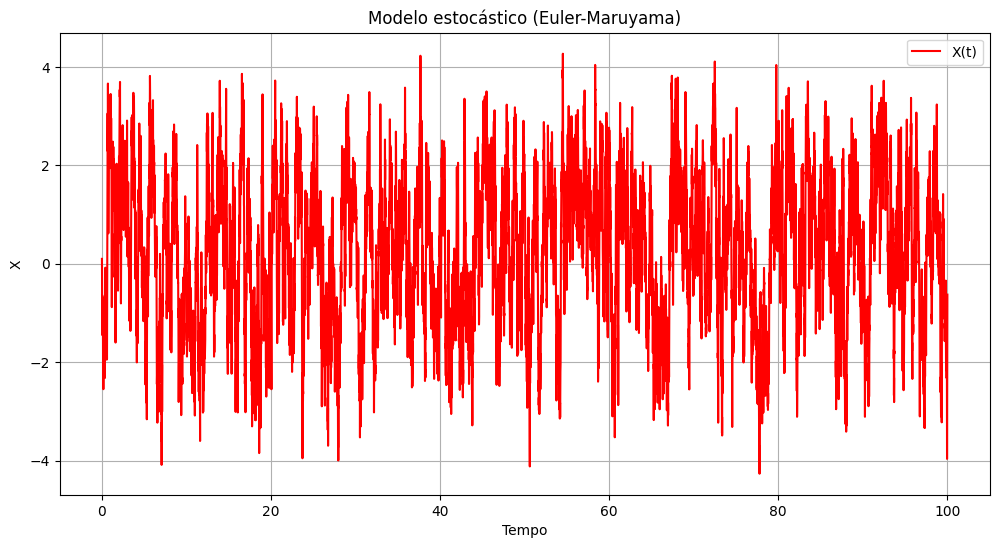

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
sigma = 4.723353388116444
x0 = 0.1
t0, tf = 0.0, 100.0
dt = 0.01
t = np.arange(t0, tf + dt, dt)
n = len(t)

# Inicialização
X = np.zeros(n)
X[0] = x0

# Euler-Maruyama
for i in range(n - 1):
    drift = X[i] - X[i]**3
    diffusion = sigma
    dW = np.random.normal(0, np.sqrt(dt))
    X[i + 1] = X[i] + drift * dt + diffusion * dW

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t, X, label="X(t)", color='red')
plt.xlabel("Tempo")
plt.ylabel("X")
plt.title("Modelo estocástico (Euler-Maruyama)")
plt.grid(True)
plt.legend()
plt.show()


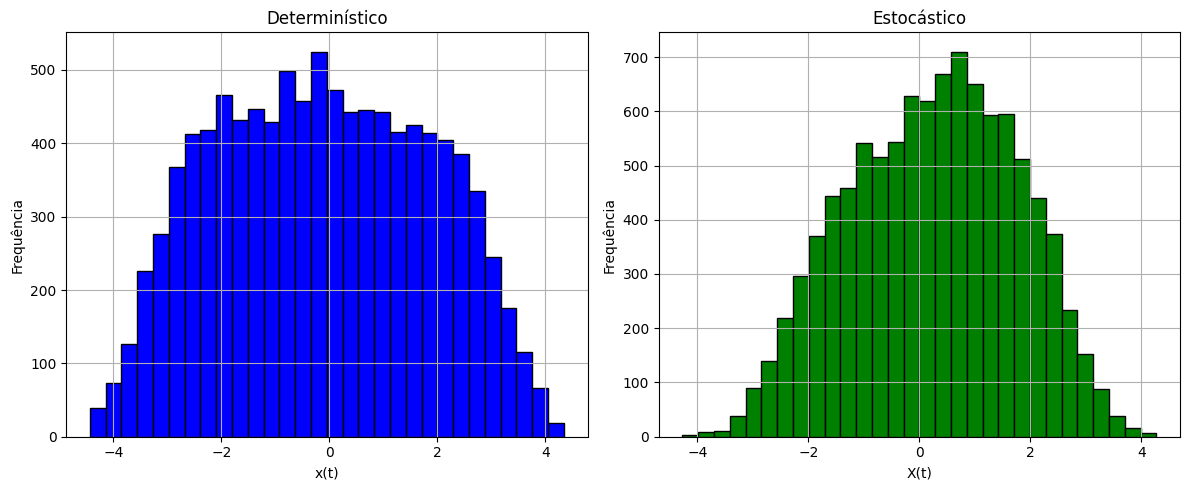

In [ ]:
import matplotlib.pyplot as plt

# Histograma do sistema determinístico
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sol.y[0], bins=30, color='blue', edgecolor='black')
plt.title("Determinístico")
plt.xlabel("x(t)")
plt.ylabel("Frequência")
plt.grid(True)

# Histograma do sistema estocástico
plt.subplot(1, 2, 2)
plt.hist(X, bins=30, color='green', edgecolor='black')
plt.title("Estocástico")
plt.xlabel("X(t)")
plt.ylabel("Frequência")
plt.grid(True)

plt.tight_layout()
plt.show()
#teste